## -----------------EDA--------------

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Climate_change_modeling\projects_files\climate_nasa.csv")
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [3]:
df.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [5]:
df.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [6]:
df.tail()

,date,likesCount,profileName,commentsCount,text
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes
521,2022-12-22T17:00:08.000Z,12,cc70f6c9dcc2637b1c5fd90046834612627c752b828cb4...,1.0,"We're experiencing severe, abnormal weather pa..."


In [7]:
# Imputing missing numeric column with median
df['commentsCount'].fillna(df['commentsCount'].median(), inplace=True)

# Filling missing text with placeholder
df['text'].fillna("no comment", inplace=True)


C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_42124\3436964202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commentsCount'].fillna(df['commentsCount'].median(), inplace=True)
C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_42124\3436964202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [8]:
df.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [9]:
# Converting date to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

In [10]:
# Cleanning text
import re
def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))
    text = re.sub(r"[^a-zA-Z']", " ", text)
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)

In [11]:
# Sentiment Labeling using TextBlob
%pip install textblob
%pip install nltk
import nltk
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: c:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Climate_change_modeling\venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: c:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Climate_change_modeling\venv\Scripts\python.exe -m pip install --upgrade pip


In [12]:
df.head(3)

,date,likesCount,profileName,commentsCount,text,year,month,weekday,clean_text,sentiment
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,5.0,Neat comparison I have not heard it before.\n ...,2022,9,Wednesday,neat comparison i have not heard it before i...,neutral
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,5.0,An excellent way to visualise the invisible! T...,2022,9,Thursday,an excellent way to visualise the invisible t...,positive
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022,9,Wednesday,does the co ghg in the troposphere affect the...,neutral


In [14]:
df.drop(columns=['profileName', 'text'], inplace=True)

In [16]:
df.head()

,date,likesCount,commentsCount,year,month,weekday,clean_text,sentiment
0,2022-09-07 17:12:32+00:00,2,5.0,2022,9,Wednesday,neat comparison i have not heard it before i...,neutral
1,2022-09-08 14:51:13+00:00,0,5.0,2022,9,Thursday,an excellent way to visualise the invisible t...,positive
2,2022-09-07 17:19:41+00:00,1,3.0,2022,9,Wednesday,does the co ghg in the troposphere affect the...,neutral
3,2022-09-08 00:51:30+00:00,4,5.0,2022,9,Thursday,excellent post i defo feel the difference o...,neutral
4,2022-09-07 19:06:20+00:00,16,26.0,2022,9,Wednesday,yes and carbon dioxide does not harm the eart...,negative


# visualisation----

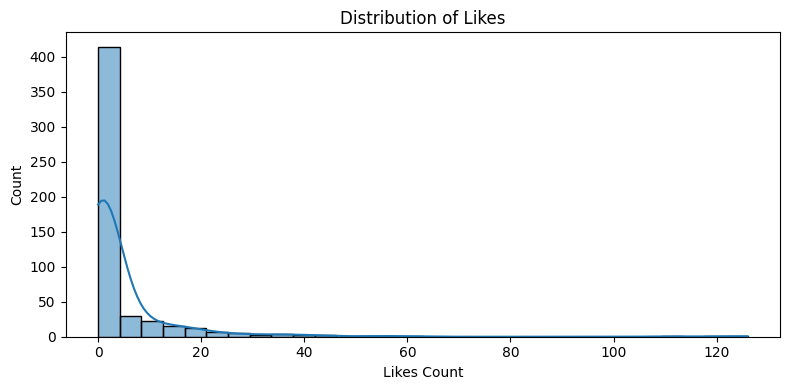

In [13]:
# Visualisation of likes count
plt.figure(figsize=(8, 4))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes Count")
plt.tight_layout()
plt.show()


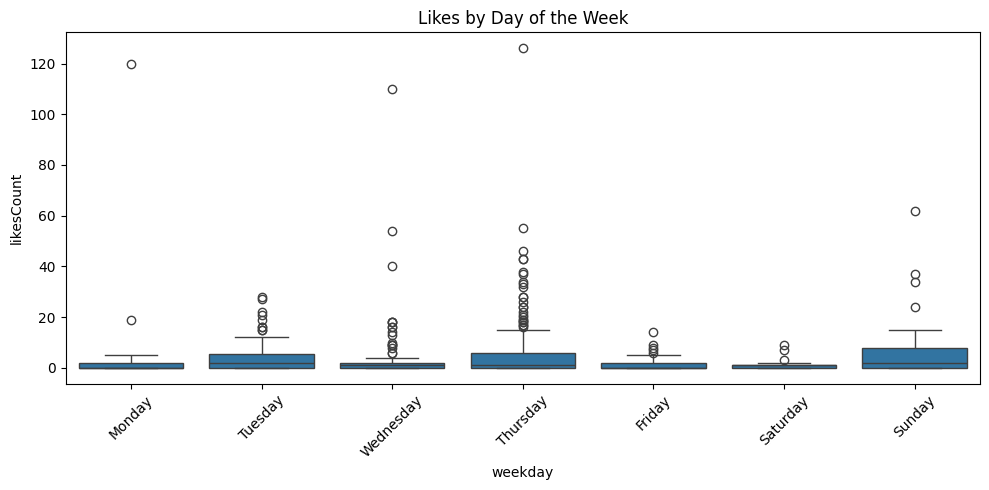

In [11]:
# Visualisation of likes by day of the week
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='weekday', y='likesCount', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Likes by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: c:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Climate_change_modeling\venv\Scripts\python.exe -m pip install --upgrade pip


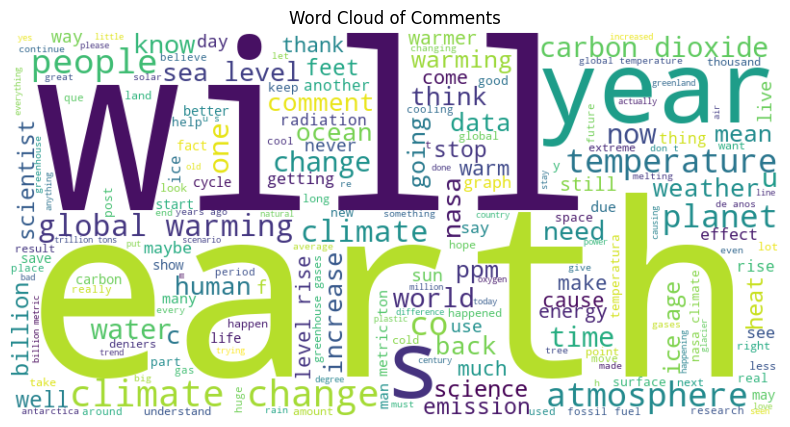

In [12]:
# Visualisation of word cloud
%pip install wordcloud
from wordcloud import WordCloud

wordcloud_img = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_img, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Comments")
plt.show()


C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_9144\4069367577.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')


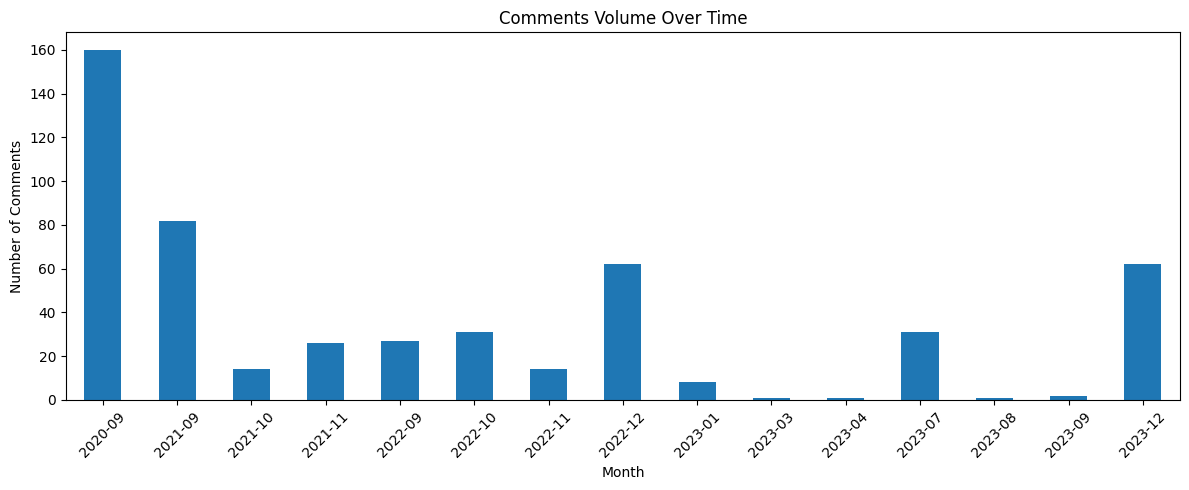

In [15]:
# Visualisation of comments quantity over the time
plt.figure(figsize=(12, 5))
df['date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title("Comments Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_2080\3647964631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='likesCount', palette='Set3')


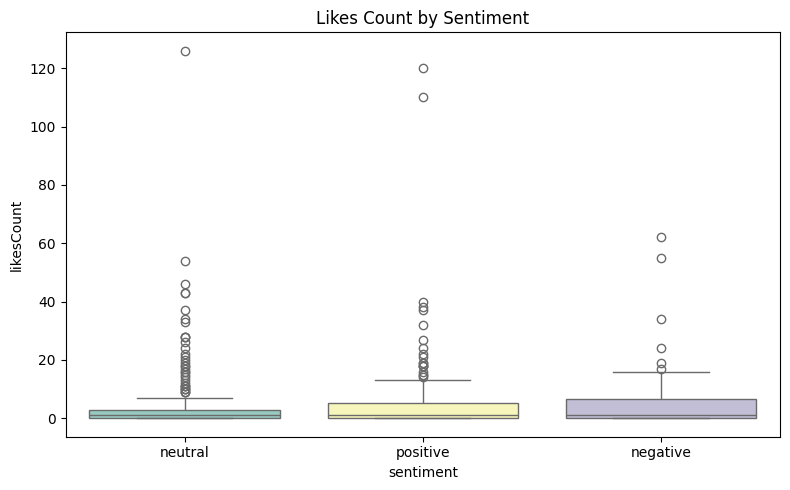

In [13]:
# Visualisation of likes vs sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment', y='likesCount', palette='Set3')
plt.title("Likes Count by Sentiment")
plt.tight_layout()
plt.show()

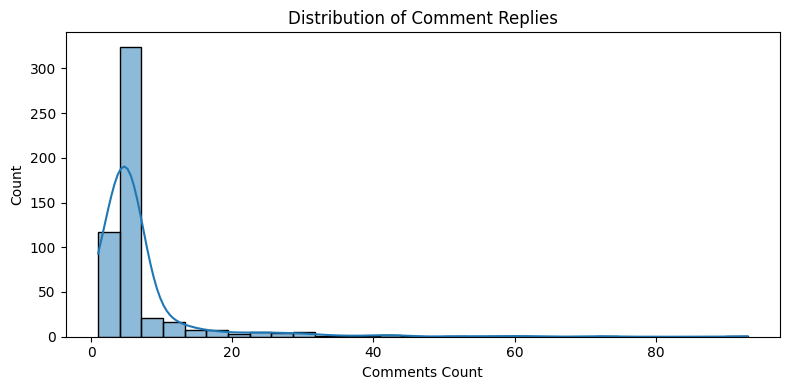

In [18]:
# Visualisation of comment replies count
plt.figure(figsize=(8, 4))
sns.histplot(df['commentsCount'], bins=30, kde=True)
plt.title("Distribution of Comment Replies")
plt.xlabel("Comments Count")
plt.tight_layout()
plt.show()

In [18]:
df.to_csv(r"C:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Climate_change_modeling\projects_files\climate_nasa_cleaned.csv", index=False)